<h1> Final Assignment: Datacademy Bootcamp - Auction data </h1>
<hr>

<p> 
    You will be working with a real-world data set, that is collected by a digital auction house. <br>
    As a Data Professional, your task is to use this data to improve the process of the auction house. <br>
    You are going to enclose the data within a SQLite database where the data contains three related tables: Auctions, Lots and Bids. <br>
    Auctions concern the actual events at which lots (items) are auctioned, after which the bids table contains all bids placed. <br>
    A more detailed overview of what these tables are comprised of is given below:
    <ol>
    <li> 
        <b><u>auctions.csv</u></b> 
        <ul>
            <li> <b>id:</b> the auction id, uniquely identifying an auction.  </li>
            <li> <b>relatedCompany:</b> the concerning company for which the items will be auctioned. </li>
            <li> <b>auctionStart:</b> the date and time at which the auction started. </li>
            <li> <b>auctionEnd:</b> the date and time at which the auction ended. </li>
            <li> <b>branchCategory:</b> the branch to which the product to be auctioned are categorized. </li>
        </ul>
    </li>
    <br>
    <li>
        <b><u>lots.csv</u></b>
        <ul>
            <li> <b>countryCode:</b> description of the country the lot is auctioned in. </li>
            <li> <b>saleDate:</b> the date and time at which the lot is sold. </li>
            <li> <b>auctionID:</b> the id reference of the auction at which the lot is offered. </li>
            <li> <b>lotNr:</b> the numeric indicator of the lot within its auction. </li>
            <li> <b>suffix:</b> additional information to the lot number. </li>
            <li> <b>numberOfItems:</b> the number of items offered within the lot. </li>
            <li> <b>buyerAccountID:</b> the id of the bidder who won the auction and bought the lot. </li>
            <li> <b>estimatedValue:</b> the estimated value of the items comprising the lot. </li>
            <li> <b>StartingBid:</b> the initial price for which the lot is offered. </li>
            <li> <b>reserveBid:</b> the minimum amount that the seller will accept as the winning bid. </li>
            <li> <b>currentBid:</b> the actual bid offered for the auctioned lot. </li>
            <li> <b>vat:</b> the percentage tax payed for the auctioned lot. </li>
            <li> <b>category:</b> the category of products to which this lot is assigned. </li>
            <li> <b>sold:</b> indicator whether the lot is sold or is left unsold. </li>
        </ul>
    </li>
    <br>
    <li>
        <b><u>bids.csv</b></u>
        <ul>
            <li> <b>auctionID:</b> the id reference of the auction at which the lot is offered. </li>
            <li> <b>lotNr:</b> the numeric indicator of the lot in which the bid is made. </li>
            <li> <b>lotID:</b> reference ID describing the lot in which the bid is made. </li>
            <li> <b>isCombination:</b> indicator if the bid is considered within a combination of bids. </li>
            <li> <b>accountID:</b> the id of the bidder who placed the bid. </li>
            <li> <b>isCompany:</b> indicator whether the bidder concerns a company. </li>
            <li> <b>bidPrice:</b> the price the bidder offered. </li>
            <li> <b>biddingDateTime:</b> the time the bid was placed by the bidder. </li>
            <li> <b>closingDateTime:</b> the time the lot is planned to close. </li>
        </ul>
    </li>
    </ol>
    Improvements can be made on several areas, of which we give you some indication of what is possible in the following sections: <br>
    <ol type="A" start="3">
        <li> Create a Database that can be called by an API. </li>
        <ul>
            <li> The database is used to correctly store relational data and can be accessed by an API. Just as in practice. </li>
        </ul>
        <li> Clustering of different Bidding Behavior. </li>
        <ul>
            <li> To create insights in different behaviours and how many different bidders there are. </li>
        </ul>
        <li> Prediction of sale or no sale. </li>
        <ul>
            <li> To make a better estimate on the performance of the auction. </li>
        </ul>
        <li> Automatically setting an "optimal" starting bid. </li>
        <ul>
            <li> Too high means unsold and too low means you're not getting the optimal price. </li>
        </ul></li>
        <li> ... </li>
    </ol>
    These subjects mentioned above are solemnly given as a guideline for which we will also give you some boilerplate code to get started.
    However, the given subjects are only examples, as you are also free to explore your own solution direction.
</p>

<hr>
<hr>
<h3> A: Import libraries </h3>

<p>
Installation of all Python libraries is done by the <i>environment.yml</i> file explained in the preliminaries. <br>
Below all libraries are imported and are given the correct aliasses, which are often used in practice. <br>
You simply have the run the code cell and you can start creating! 
</p>

In [1]:
#%cd ../../..

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import sqlite3

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

modulePath = "/Modules/M10_FINAL/src"
dataPath = "data"

In [3]:
from datacademy.modules import Module10

module = Module10(server_address='https://devdatacademyapi.azurewebsites.net')

[Back to top](#module-3---structured-query-language-sql)

<hr>

# B. Descriptive Analytics
All Data Science projects start by getting a clear understanding of the data. <br>
This section will guide you through the steps to execute descriptive analytics and familiarize yourself with the available data. <br>
We set out some logical steps that would normally be included in such an initial data review. <br>
These steps utilize basic Python (/Pandas) functions, used to do the follow:

* `Read the data` - Read the data from the given data source.
* `Quick view` - Look at the first x rows of the data set.
* `Missing values` - Investigate the amount of missing values.
* `Outliers` - Review the numerical ranges in the data set.
* `Analyze categories` - Investigate the distribution over the available categories.

Execution of these steps will give you a basic understanding of your data. <br>
Basic understanding is sufficient for now, the rest will come when you start building and training your models.

## B1. Read the data
As you will be working with larger data sets, we share them in a more suitable way. <br>
`Parquet` is a data format designed to handle large amounts of data. <br>
Reading them can be done in a similar way as we did with `CSV` files in the past. <br>
However, now we use the command <code>pd.read_parquet()</code> and the file extension <code>.parquet</code>.

In [5]:
#TODO: Read the auctions, lots and bids using the dataPath
auctions = pd.read_parquet(dataPath+"/auctions.parquet")
lots = pd.read_parquet(dataPath+"/lots.parquet")
bids = pd.read_parquet(dataPath+"/bids.parquet")

## B2. Quick view
To start we quickly review the first rows of the different data frames. <br>
In doing so, we get a feeling for the structure of the data frame and the actual content that is in there. <br>
The `.head()` function returns by default the first 5 rows. <br>
If, for example, you want to retrieve the first 10 rows, you can use it as follows `.head(n=10)`.

### Questions B2
* `Q_B2_0` - What is the name of the company with `woodworking` assigned as `branchCategory`, based on the top 10 rows from `auctions` daframe? <br>
* `Q_B2_1` - What is the value for `CurrentBid` of the lot on row index 4, from the `lots` data frame? <br>
* `Q_B2_2` - What is the `bidPrice` for the with `AccountID` equal to `3094282` looking at the top 5 rows from the `bids` data frame?

In [10]:
#TODO: Print and investigate the first 10 rows of the auctions dataframe.
auctions.head(n=10)

,id,relatedCompany,auctionStart,auctionEnd,branchCategory
0,200001,Solutions Electronic Advanced,2017-12-22 16:32:01,2018-01-10 15:02:01,transport
1,200002,Design Systems Source,2017-09-20 13:50:04,2018-01-10 13:10:04,metal
2,200003,Electronic Design Internet,2018-02-01 14:09:22,2018-01-10 13:09:22,woodworking
3,200136,Contract Graphics Adventure,2018-05-23 16:11:20,2018-06-01 10:11:20,construction
4,200139,Alpha Virtual,2018-02-05 12:50:01,2018-02-09 12:30:01,construction
5,200006,Design Vision Inc,2018-01-08 08:26:09,2018-01-16 14:56:09,other
6,200007,Hardware West Organization,2017-11-23 09:27:00,2018-01-30 13:27:00,other
7,200008,Telecom Adventure Power Limited,2017-11-23 09:29:22,2018-01-30 13:29:22,other
8,200009,South Adventure Contract,2017-10-27 22:01:30,2018-01-23 15:01:30,real estate
9,200010,Signal Interactive,2017-12-15 15:19:30,2018-01-03 19:19:30,construction


In [14]:
# What is the name of the company with woodworking assigned as branchCategory, based on the top 10 rows from auctions daframe?
Q_B2 = 'Electronic Design Internet' 

module.check("B2", Q_B2)

🟢 That's correct!          


'Electronic Design Internet'

In [7]:
#TODO: Print and investigate the first x rows of the lots dataframe.
lots.head()

,countryCode,saleDate,auctionID,lotNr,suffix,numberOfItems,buyerAccountID,estimatedValue,startingBid,reserveBid,currentBid,vat,category,sold
0,Not Available,2018-01-02 14:22:29,200013.0,1.0,Not Available,1.0,99999.0,0.0,10.0,1.0,160.0,21.0,Rolling Material,0.0
1,Not Available,2018-01-02 14:22:29,200013.0,2.0,Not Available,1.0,3125554.0,0.0,25.0,1.0,25.0,21.0,Rolling Material,1.0
2,Not Available,2018-01-02 14:22:29,200013.0,3.0,Not Available,1.0,99999.0,0.0,25.0,1.0,25.0,21.0,Rolling Material,0.0
3,Not Available,2018-01-02 14:22:29,200013.0,4.0,Not Available,1.0,99999.0,0.0,25.0,1.0,160.0,21.0,Rolling Material,0.0
4,Not Available,2018-01-02 14:22:29,200013.0,5.0,Not Available,66.0,99999.0,0.0,10.0,1.0,55.0,21.0,Furniture and Accessories,0.0


In [13]:
# What is the value for CurrentBid of the lot on row index 4, from the lots data frame?
Q_B2_1 = 55
module.check("B2_1", Q_B2_1)

🟢 That's correct!          


55

In [8]:
#TODO: Print and investigate the first x rows of the bids dataframe.
bids.head()

,auctionID,LotNr,bidNr,LotID,IsCombination,AccountID,IsCompany,BidPrice,BiddingDateTime,ClosingDateTime
0,200001,1,1,4705593.0,0,3094282,1,17500.0,2017-12-23 08:52:28,2018-01-10 14:35:00
1,200001,1,2,4705593.0,0,2930599,1,18000.0,2017-12-30 16:05:36,2018-01-10 14:35:00
2,200001,1,3,4705593.0,0,2851482,1,18500.0,2017-12-31 16:02:21,2018-01-10 14:35:00
3,200001,1,4,4705593.0,0,2930599,1,19000.0,2018-01-03 15:52:04,2018-01-10 14:35:00
4,200001,1,5,4705593.0,0,2851482,1,19500.0,2018-01-03 20:21:57,2018-01-10 14:35:00


In [12]:
# What is the bidPrice for the with AccountID equal to 3094282 looking at the top 5 rows from the bids data frame?
Q_B2_2 = 17500.0

module.check("B2_2", Q_B2_2)

🟢 That's correct!          


17500.0

<hr>
<h5>B3: Look for missing (<i>null</i>) values in the data using the <code>.info(show_counts=True)</code> command on the Pandas Dataframes and answer the questions below:</h5>
<p> 
  Q_B3:   How many nulls values does Auctions dataframe have?<br>
Q_B3_1:   [True or False] Only the column `numberOfItems` has null values in lots dataframe. <br>
Q_B3_2:   [True or False] Bids dataframe has null values in all columns.<br>
</p>

In [8]:
#TODO: Print and investigate the Pandas Dataframe information of the auction data, especially the null_counts.
Q_B3 = 0
module.check("B3", Q_B3)
auctions.info(show_counts=True) 

🟢 That's correct!       


0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1556 non-null   int64 
 1   relatedCompany  1556 non-null   object
 2   auctionStart    1556 non-null   object
 3   auctionEnd      1556 non-null   object
 4   branchCategory  1556 non-null   object
dtypes: int64(1), object(4)
memory usage: 60.9+ KB


In [9]:
#TODO: Print and investigate the Pandas Dataframe information of the lots data, especially the null_counts.

lots.info(show_counts=True) 


Q_B3_1 = 0
module.check("B3_1", Q_B3_1 )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285307 entries, 0 to 285306
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   countryCode     285307 non-null  object 
 1   saleDate        285307 non-null  object 
 2   auctionID       285307 non-null  float64
 3   lotNr           285307 non-null  float64
 4   suffix          285307 non-null  object 
 5   numberOfItems   285307 non-null  float64
 6   buyerAccountID  285307 non-null  float64
 7   estimatedValue  285307 non-null  float64
 8   startingBid     285307 non-null  float64
 9   reserveBid      285307 non-null  float64
 10  currentBid      285307 non-null  float64
 11  vat             285307 non-null  float64
 12  category        284646 non-null  object 
 13  sold            285307 non-null  float64
dtypes: float64(10), object(4)
memory usage: 30.5+ MB


🟢 That's correct!       


0

In [10]:
#TODO: Print and investigate the Pandas Dataframe information of the bids data, especially the null_counts.

bids.info(show_counts=True) 


Q_B3_2 = False
module.check("B3_2", Q_B3_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178996 entries, 0 to 3178995
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   auctionID        3178996 non-null  int64  
 1   LotNr            3178996 non-null  int64  
 2   bidNr            3178996 non-null  int64  
 3   LotID            3178996 non-null  float64
 4   IsCombination    3178996 non-null  int64  
 5   AccountID        3178996 non-null  int64  
 6   IsCompany        3178996 non-null  int64  
 7   BidPrice         3178996 non-null  float64
 8   BiddingDateTime  3178996 non-null  object 
 9   ClosingDateTime  3178996 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 242.5+ MB
🟢 That's correct!       


False

<hr>
<h5>B4: Look for potential outliers in the numeric values using the <code>.describe()</code> command on the Pandas Dataframes and answer the questions below:</h5>
<p> 
  Q_B4:   what is the max `id` for the Auctions dataframe?<br>
Q_B3_1:   What is the max value for `numberOfItems` in lots dataframe?<br>
Q_B3_2:   What is the mean value for `BidPrice` in bids dataframe?<br>
</p>

In [11]:
#TODO: Print and investigate the numerical values in the auction Pandas Dataframe.
# Check max `id` value to answer!

print(auctions.describe())

Q_B4 = 210455.0
module.check("B4", Q_B4)

                  id
count    1556.000000
mean   203384.173522
std      4409.692815
min    200001.000000
25%    200398.750000
50%    200783.500000
75%    210066.250000
max    210455.000000


🟢 That's correct!       


210455.0

In [12]:
#TODO: Print and investigate the numerical values in the lots Pandas Dataframe.
#Check the max value for `numberOfItems`.

print(lots.describe())

Q_B4_1 = 312000.0
module.check("B4_1", Q_B4_1)

           auctionID          lotNr  numberOfItems  buyerAccountID  \
count  285307.000000  285307.000000  285307.000000    2.853070e+05   
mean   205292.621492     706.946868      15.461037    2.179230e+06   
std      4884.057343    1046.480555     693.356570    1.348148e+06   
min    200001.000000       0.000000       1.000000    9.999900e+04   
25%    200420.000000     120.000000       1.000000    9.999900e+04   
50%    201074.000000     308.000000       1.000000    2.943484e+06   
75%    210201.000000     738.000000       2.000000    3.169882e+06   
max    210455.000000    9618.000000  312000.000000    3.338731e+06   

       estimatedValue   startingBid     reserveBid    currentBid  \
count    2.853070e+05  2.853070e+05  285307.000000  2.853070e+05   
mean     3.951862e+02  1.306506e+02       1.206276  4.045803e+02   
std      4.520164e+03  2.878194e+03      35.009842  4.434069e+03   
min     -1.000000e+00  0.000000e+00       0.000000 -1.508000e+02   
25%      0.000000e+00  1.0000

312000.0

In [13]:
#TODO: Print and investigate the numerical values in the bids Pandas Dataframe.
# Check the mean for the BidPrice 
#Tip use the command `.apply(lambda s: s.apply('{0:.5f}'.format))` next to the `.describe()` to convert the scientif numbers.

print(bids.describe().apply(lambda s: s.apply('{0:.5f}'.format)))

Q_B4_2 = 3178996.0
module.check("B4_2", Q_B4_2)

           auctionID          LotNr          bidNr          LotID  \
count  3178996.00000  3178996.00000  3178996.00000  3178996.00000   
mean    206620.49532      455.07410       15.72412  5294384.67618   
std       4698.34643      824.57814       15.96777   348707.38813   
min     200001.00000        0.00000        1.00000  4636761.00000   
25%     200652.00000       54.00000        4.00000  4929955.00000   
50%     210071.00000      164.00000       11.00000  5435180.00000   
75%     210238.00000      432.00000       22.00000  5583198.00000   
max     210455.00000     9618.00000      216.00000  5769222.00000   

       IsCombination      AccountID      IsCompany       BidPrice  
count  3178996.00000  3178996.00000  3178996.00000  3178996.00000  
mean         0.00007  3030902.16548        0.66223      765.59753  
std          0.00826   223980.36576        0.47295     3756.76783  
min          0.00000  2505522.00000        0.00000        1.00000  
25%          0.00000  2883948.00000   

3178996.0

<hr>
<h5>B5: Investigate the occurrence of different categories in the auction branch categories column using the <code>Counter()</code> function from the <a href="https://docs.python.org/3/library/collections.html">collections</a> library. </h5>
<p>
As this is a new library that we include, we recommend you check out the Collections documentation by following the hyperlink. <br>
If you look for the <b>Counter objects</b> section you will find some example code which you can replicate.

In [14]:
totalByCategory = Counter(auctions.branchCategory)

Q_B5 = dict(totalByCategory)
print(Q_B5)
module.check("B5", Q_B5)

{'transport': 202, 'metal': 202, 'woodworking': 68, 'construction': 142, 'other': 213, 'real estate': 40, 'agricultural': 113, 'consumer': 283, 'food': 208, 'graphical': 27, 'plastic': 10, 'pharmaceutical': 48}
🟢 That's correct!       


{'transport': 202,
 'metal': 202,
 'woodworking': 68,
 'construction': 142,
 'other': 213,
 'real estate': 40,
 'agricultural': 113,
 'consumer': 283,
 'food': 208,
 'graphical': 27,
 'plastic': 10,
 'pharmaceutical': 48}

<hr>
<hr>
<h3> C: Preprocessing and storing </h3>
<p>
The initial analysis of the raw data consisted of the descriptive analysis. Now, the invention provides a method for preprocessing and storing data, which relates to the technical field of data storage and comprises the following steps: <br>
<ol>
    <li> <u><b>Preprocessing the data to be stored according to the descriptive analysis results:</b></u> Transform the raw data in a useful and efficient format. </li>
    <li> <u><b>Constructing a data storage platform:</b></u> Setup a SQL database. </li>
    <li> <u><b>Acquiring data to be stored:</b></u> Retrieving the preprocessed data. </li>
    <li> <u><b>Transmitting the data to be stored:</b></u> Fill this database with the data. </li>
</ol>
<br>
As seen in the above steps, after the initial preprocessing we store the data in a database. For this we will use a local mysql server, just as we learned in <a href="https://participant.easy-lms.com/datacademy/play/Module%2006%20-%20API%20Advanced/course%2384838"><b>Datacademy - API Advanced</b></a>. <br>
We want to create a database with our preprocessed data since it is efficient* to store the data you are going to use for your models (Machine Learning and Dashboarding). <br>
There is still some final preprocessing neccessary before the data can be fed to a Machine Learning model since different models need different input. <br>
But the main purpose of the data preprocessing in this fase is to get a clean dataset and save that to your database. <br>
<br>
* = <i>Enhance data consistency and quality; Encourage a rigorous approach to data management</i>
</p>

<hr>
<h5> C1: Preprocessing raw the data </h5>
<p>
In this subcomponent some of the code is already given, however additional functionality is required to make the framework more robust. <br>
To guide you through the process a list of consecutive actions is shown below:
<ol>
    <li> <u><b>Data types:</b></u> Selecting a new data type corresponding to the column. </li>
    <li> <u><b>Outlier handling:</b></u> Remove or transform outliers in the dataset. </li>
    <li> <u><b>Missing values:</b></u> Manage your data with missing data in the dataset. </li>
    <li> <u><b>Remove duplicate values:</b></u> Creates consistent data in the dataset. </li>
</ol>
As mentioned before mostly any further steps of the data preprocessing steps depends on the next steps. <br>
For example, Feature Engineering and Scaling the data is dependent on the method. Since e.g., you do not want any scaled pricing data in you dashboard, you want actual money. <br>
<br>
We first start with correcting all the Data Type inconsistencies. Some conficts may occur when we want to create relational databases. <br>
As you might have noticed the related columns: <code>id</code> in <code>auctions</code> <--> <code>auctionID</code> in <code>lots</code>; and <code>lotNr</code> in <code>lots</code> <--> <code>LotNr</code> in <code>bids</code> have different data types. <br>
Not only these columns but also the columns: <code>numberOfItems</code> and <code>buyerAccountID</code> in <code>lots</code>; <code>LotID</code> in <code>bids</code> have incorrect dtypes.<br>
<br>
<l>
    <li> <u><b>Objective 1:</b></u> Transform all these inconsistent dtypes to integers. </li>
</l>
<br>
We also observe that the dates are all seen as objects and not as datetimes. Transform the following datetimes: <code>auctionStart</code> and <code>auctionEnd</code> in <code>auctions</code>; <code>saleDate</code> in <code>lots</code>; <code>BiddingDateTime</code> and <code>ClosingDateTime</code> in <code>bids</code>.<br>
<br>
<l>
    <li> <u><b>Objective 2:</b></u> Transform all these inconsistent dtypes to datetimes. </li>
</l>
<br>
And finally we want to transform the columns: <code>sold</code> in <code>lots</code> and <code>IsCombination</code> and <code>IsCompany</code> in <code>bids</code> to a boolean to make it make obvious. <br>
<l>
    <li> <u><b>Objective 3:</b></u> Transform the final inconsistent dtypes to a Boolean. </li>
</l>
<br>
The database we are using (SQLite) does not have a storage class set aside for storing dates and/or times. <br>
Instead, the built-in Date And Time Functions of SQLite are capable of storing dates and times as TEXT values. <br>
We therefore have to transform these values if we want to work with them.
</p>

In [15]:
# Transforms each column to the correct dtype

# Transforms each column to the correct dtype
dtype_dic = {
    "integer" : {
        'lots': ['auctionID', 'lotNr', 'numberOfItems', 'buyerAccountID'],
        'bids': ['LotID']
                }, 
    "datetime": {
        'auctions': ['auctionStart', 'auctionEnd'],
        'lots': ['saleDate'],
        'bids': ['BiddingDateTime', 'ClosingDateTime']
                },
    "boolean": {
            'lots': ['sold'],
            'bids': ['IsCombination', 'IsCompany']
               }
            }

for keys_dtype in dtype_dic:
    for keys_df in dtype_dic[keys_dtype]:
        for column_name in dtype_dic[keys_dtype][keys_df]:
            
            if keys_dtype == 'integer':
                if keys_df == 'auctions':
                    auctions[column_name] = auctions[column_name].astype(int)
                elif keys_df == 'lots':
                    lots[column_name] = lots[column_name].astype(int)
                elif keys_df == 'bids':
                    bids[column_name] = bids[column_name].astype(int)

            elif keys_dtype == 'datetime':
                if keys_df == 'auctions':
                    auctions[column_name] = pd.to_datetime(auctions[column_name], format='%Y-%m-%d %H:%M:%S', errors='coerce')
                elif keys_df == 'lots':
                    lots[column_name] = pd.to_datetime(lots[column_name], format='%Y-%m-%d %H:%M:%S', errors='coerce')
                elif keys_df == 'bids':
                    bids[column_name] = pd.to_datetime(bids[column_name], format='%Y-%m-%d %H:%M:%S', errors='coerce')
            
            elif keys_dtype == 'boolean':
                if keys_df == 'lots':
                    lots[column_name] = lots[column_name].astype(bool)
                elif keys_df == 'bids':
                    bids[column_name] = bids[column_name].astype(bool)

Then we start with looking for actual outliers. We assume and see in our descriptive analysis that there are not any inconsistancies in the auction and bids DataFrame. <br>
However, we observe that in the lots the <code>estimatedValue</code> and <code>currentBid</code> column negative values contains. This can not be the case in real life. <br>
To correct for this, look at the values where these negative numbers occur. Then change or remove these values.

<hr>
<h5>Questions:</h5>
<p> 
  Q_C1:   How many lots with negative values on `currentBid`column? If there is any, remove them from the dataframe.<br>
Q_C1_1:   How many rows with the `Category` `Unknow` in the lots dataframe?<br>
Q_C1_2:   How many duplicates rows does auctions datafrane have?<br>
</p>

In [16]:
#TODO: Print all lots with currentBid smaller than 0.
#How many lots with negative values on `currentBid`column? If there is any, remove them from the dataframe.

Q_C1 = 4
module.check("C1", Q_C1)

lots[lots.currentBid < 0]

🟢 That's correct!       


4

,countryCode,saleDate,auctionID,lotNr,suffix,numberOfItems,buyerAccountID,estimatedValue,startingBid,reserveBid,currentBid,vat,category,sold
6806,Not Available,2018-01-15 15:09:08,200099,201,Not Available,1,2817860,0.0,50.0,0.0,-30.00,21.0,Furniture and Accessories,True
6819,Not Available,2018-01-15 15:09:08,200099,214,Not Available,1,2652045,0.0,50.0,0.0,-75.00,21.0,Furniture and Accessories,True
118115,Not Available,2018-05-31 18:07:26,200797,173,Not Available,1,99999,0.0,10.0,1.0,-57.93,21.0,Boats,True
204955,Not Available,2019-03-27 20:03:30,210210,122,Not Available,1,99999,200.0,10.0,1.0,-150.80,21.0,Rolling Material,True


In [17]:
# These rows need to be removed because we checked and it does not match the bids in the time course, you can not say anything about it
remove_row_ids = lots[lots.currentBid < 0].index

# So these are the action rows we want to remove.
lots.drop(remove_row_ids, inplace=True)

In [18]:
# Checking if the values was deleted.
lots[lots.estimatedValue < 0]

,countryCode,saleDate,auctionID,lotNr,suffix,numberOfItems,buyerAccountID,estimatedValue,startingBid,reserveBid,currentBid,vat,category,sold
158122,Not Available,2019-01-28 19:26:14,210001,395,Not Available,1,3031944,-1.0,10.0,1.0,25.0,21.0,Hand Tools,True


In [19]:
# This one can go from -1.0 --to-> 0.0 
lots['estimatedValue'] = lots.estimatedValue.replace({-1.0:0.0})
# lots[lots.estimatedValue < 0]

Once we set all the data types right, we can check if there are some missing values present. <br>
First we check each dataframe for missing values. We notice that there are only missing values in the <i>category</i> column of the <i>lots</i> DataFrame.
<br>
<l>
    <li> <u><b>Objective 1:</b></u> Transform all the <code>NaN</code> values in the <i>category</i> column to <i>Unknown</i>. </li>
</l>
<br>
Then we want to check if all our relations between our different data tables have corresponding values. <br>
So for example, we only want data were there is a bid placed, this bid corresponds to a lot, and finally this lot corresponds to an auction. <br>
It can be the case that there is some links between of these relations (bids <-> lots, lots <-> auctions) is missing. <br>
It is therefore our job to figure out if all of these data points have linking values. <br>
<br>
<l>
    <li> <u><b>Objective 2:</b></u> Check if there are some missing values in the lots <-> auctions relationship<i>*</i>. If so, remove the corresponding rows. </li>
</l>
<br>
<i>*Tip: Check this with an outer join.</i> <br>
We only do this for the lots <-> auctions relationships. Since doing this for the bids <-> lots relation results in a very inefficient computational cost. 
<br>

In [20]:
#TODO check how many NaN does lots have
# lots[lots.isnull().any(axis=1)]

#TODO Use fill NaN to replace Nan to `Unknow`
lots['category'] = lots['category'].fillna('Unknown')
# lots[lots.isnull().any(axis=1)]

# How many rows with the `Category` `Unknow` in the lots dataframe?
Q_C1_1 = 66
module.check("C1", Q_C1)

lots[lots['category'] == 'Unknown']

🟢 That's correct!       


4

,countryCode,saleDate,auctionID,lotNr,suffix,numberOfItems,buyerAccountID,estimatedValue,startingBid,reserveBid,currentBid,vat,category,sold
1935,Not Available,2018-01-03 14:13:00,200061,122,Not Available,4,3167379,0.0,10.0,1.0,10.0,21.0,Unknown,True
10475,Not Available,2018-01-22 13:22:02,200020,1194,Not Available,1,99999,0.0,10.0,1.0,0.0,21.0,Unknown,False
10476,Not Available,2018-01-22 13:22:02,200020,1195,Not Available,1,99999,0.0,10.0,1.0,0.0,21.0,Unknown,False
10477,Not Available,2018-01-22 13:22:02,200020,1196,Not Available,1,99999,0.0,10.0,1.0,0.0,21.0,Unknown,False
10478,Not Available,2018-01-22 13:22:02,200020,1197,Not Available,1,99999,0.0,10.0,1.0,0.0,21.0,Unknown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274495,Not Available,2019-06-17 15:02:13,210415,13,Not Available,1,3022492,12000.0,1000.0,0.0,11250.0,21.0,Unknown,True
274496,Not Available,2019-06-17 15:02:13,210415,14,Not Available,1,99999,16000.0,1000.0,0.0,13850.0,21.0,Unknown,True
279573,Not Available,2019-06-24 12:07:23,210432,230,Not Available,5,2599805,0.0,10.0,1.0,355.0,21.0,Unknown,True
281000,Not Available,2019-06-25 14:11:02,210449,1,Not Available,1,99999,0.0,1.0,1.0,0.0,0.0,Unknown,False


In [21]:
# This returns the ids of the auctions which doesn't occur in the lots auctionID column.
remove_these_ids = pd.merge(lots, auctions, left_on='auctionID', right_on='id', how='outer')[pd.merge(lots, auctions, left_on='auctionID', right_on='id', how='outer').lotNr.isna()].id.unique()

# So these are the action rows we want to remove.
auctions.drop(auctions.index[auctions['id'].isin(remove_these_ids)], inplace=True)

And finally, we do not want any duplicate values in our dataset. <br>
Removing duplicate values from your data set plays an important role in the cleansing process. <br>
Duplicate data takes up unnecessary storage space and slows down calculations at a minimum. <br>
At worst, duplicate data can skew analysis results and threaten the integrity of the data set. <br>
<br>
<l>
    <li> <u><b>Objective 1:</b></u> Remove the rows where there is a duplicate auction id in the auction dataframe. </li>
</l>
<br>
<i>*Tip: Remove the latest auctionEnd time and not the earliest.</i> <br>
You can check why we want you to do this. Because the corresponding lot ending time needs to be the same as this auction ending time. 
<br>

In [22]:
dupl_df = auctions.groupby('id').filter(lambda x: len(x) > 1).sort_values('id')

# How many duplicates rows does auctions datafrane have?
Q_C1_2 = 12
module.check("C1_2", Q_C1_2)
len(dupl_df)

🟢 That's correct!       


12

12

In [23]:
# Get al duplicate id and store the index of the onces you want to remove in a list
unique_dupl_id = dupl_df.id.unique()
index_to_drop = []
lots.loc[(lots.auctionID == 200218)]['saleDate'].unique()
for un_id in unique_dupl_id:
    remove_date = dupl_df[dupl_df['id']==un_id]['auctionEnd'].max()
    
    index_to_drop.append(dupl_df.loc[(dupl_df.id == un_id) & (dupl_df.auctionEnd == remove_date)].index)

In [24]:
# Flatten the list comprehension
flat_ls = [item for sublist in index_to_drop for item in sublist]

# So these are the action rows we want to remove.
auctions.drop(flat_ls, inplace=True)

<hr>
<h5> C2: Storing the preprocessed data </h5>
<p> 
After gaining a greater understanding of the data and creating some clustering and prediction models, it is time to put our code into production. <br>
Before being able to do this, we first need to get our data to a database and create APIs to communicate with this database. <br>
<br>

For this assignment we will use a local mysql server, just as we learned in [<b>FastAPI with SQL - Tutorial</b>](https://www.youtube.com/watch?v=eltKL8kC160). <br>
A lot of code is already given, however additional functionality is required to make the framework more robust. <br>
<br>
<l>
    <li> <u><b>Objective 1:</b></u> Create a <code>model.py</code> file in the M10_FINAL > app folder with the correct columns and relationships. </li>
</l>
<br>
Next up are the Pydantic models, which define more or less a "schema" (a valid data shape). This will shape our data which the API will recieve and the API will respond with. <br>
To make thing easier, have a look back at the API - Advanced course.<br> 
<br>
<l>
    <li> <u><b>Objective 2:</b></u> Create the Pydantic models (or let's say "schemas") to have common attributes while creating or reading data. </li>
</l>
<br>
Now we're go ahead a move on to creating the API and getting everything up and running. <br>
As you may recall we use two files. The <code>main.py</code> (1.) file represents where our API lifes. <br>
And the <code>services.py</code> (2.) file can be seen as the middle man between the API and the database. <br>
<br>
<l>
    <li> <u><b>Objective 3:</b></u> Create the <code>main.py</code> and <code>services.py</code> files (similar as in the <b>API - Advanced course</b>: <i>API - DataBase setup</i> in "main.py and services.py for users"). </li>
</l>
<br>
Since most of the work is now set and done, we can start the API and create a database:
<ol>
    <li> Open the Anaconda Prompt (anaconda3), <i>do not forget to activate the environment</i>; </li>
    <li> Navigate to your locally stored folder M10_Final; </li>
    <li> Load the fastapi connections and create an empty database using the command: <code>uvicorn app.main:app --reload</code>; </li>
    <li> Open the url on which Uvicorn is running and append <b>/docs</b> to the end, for example: <i>"http://127.0.0.1:8000/docs"</i>
</ol>
If it is working correctly a new database.db will appear in the M10_FINAL > src folder. Your task is now to fill you database you have created. <br>
We already proved the code for you to fill you database. To do so: <br>
<br>
<l>
    <li> <u><b>Objective 4:</b></u> Send our cleaned DataFrames to the database by running the code* below. </li>
</l>
<br>
<i>*Note 1: This uploadData function replaces all the data currently in your database. It does NOT append data to it.</i> <br>
<i>*Note 2: This uploadData function might take some time since it has quite some data to store.</i> <br>
</p>

In [25]:
from app.uploadData import uploadData  
    
df_to_upload = {
    'auctions': auctions,
    'lots': lots,
    'bids': bids
    }
_ = uploadData(dic_dfs=df_to_upload)      
                                      

--- Finished upload auctions data. ---


--- Finished upload lots data. ---
--- Finished upload bids data. ---


As an extra assignment, we can also perform some SQL queries over our stored data.  <br>
It is a reliable and efficient language used for communicating with the database. <br>
Some advantages of SQL are as follows: <br>
<ol>
    <li> Large amount of data is retrieved quickly and efficiently; </li>
    <li> For data retrieval, large number of lines of code is not required; </li>
    <li> And it is relatively easy to learn and understand. </i>
</ol>
We use the Python <code>SQLite3</code> module to integrate the SQLite database with Python. <br>
It is a pretty straightforward and simple-to-use library for interacting with SQLite databases. <br>
There is no need to install this module separately as it comes along with Python after the 2.5x version.<br>

In [26]:
conn = sqlite3.connect(f"./database.db")
cur = conn.cursor()
sql_query = """
            SELECT * 
            FROM 'lots'
            LIMIT 0,1
            """
display(cur.execute(sql_query).fetchall())
conn.close()

[('Not Available',
  '2018-01-02T14:22:29',
  200013,
  1,
  'Not Available',
  1,
  99999,
  0.0,
  10.0,
  1.0,
  160.0,
  21.0,
  'Rolling Material',
  0)]

<hr>
<hr>
<h3> D: Cluster bidding behavior </h3>
<p>
The initial analysis of the data will consists of clustering of bidding behavior. <br>
By clustering the behavior we gain insight into what bidding strategies there are amongst different bidders. <br>
Besides being of big descriptive value, these clusters can also be used in further programming like a prediction model. <br>
The expected composition of different bidder behaviors can for example be of determinative value for the outcome of the auction. <br>

In this module you will implement the KMeans algorithm to classify certain bidders into different categories of behavior. <br>
To guide you through the process a list of consecutive actions is shown below:
<ol>
    <li> <u><b>Feature Engineering:</b></u> Extract useful characteristics from the dataset. </li>
    <li> <u><b>Scale the data:</b></u> Apply scaling to all numeric values. </li>
    <li> <u><b>Find number of clusters:</b></u> Use the elbow method in the pre-written code below to find the optimal number of clusters. </li>
    <li> <u><b>Cluster the data:</b></u> Using the found optimal number of clusters, cluster the entire dataset. </li>
    <li> <u><b>Extract cluster characteristics:</b></u> Retrieve the average values of all parameters per cluster. </li>
</ol>
</p>

<p>
Notice that we need to query data from database tables in almost all web apps. <br>
So, let's begin to create function that can create a Pandas DataFrame for our database tables given a query.
<br>
<p>

In [27]:
def pandas_df_from_database(table:str=None, query:str=None) -> pd.DataFrame:
    """
    Loading data from an SQLite database table into a Python Pandas Data Frame.

    Args:
        path_db (str): The path to the folder where the database is stored;
        table (str): If we only want to retrieve one table, the table name is needed;
        query (str): Write a custom query to fetch.

    Returns:
        pd.DataFrame: Dataframe retrieve from the database.
    """

    # Connect to the SQLite database using the line:
    conn = sqlite3.connect((f"database.db"))

    # Use table or query (if both are provided use table)
    if table:
        query_db = f"SELECT * FROM {table};"
    elif query:
        query_db = query
    else:
        print("No input is given")

    # The line that converts SQLite data to a Panda data frame is:
    database_table = pd.read_sql_query(query_db, conn)
    conn.close()

    return database_table

<hr>
<h5> D1: Feature Engineering </h5>
<p>
First we will extract some statistics about different bidders within an auction. <br>
To do this, some characteristics of the lots are needed as well, which are:
<ol>
    <li> <b>FirstBid:</b> Datetime object describing the moment the first bid is placed. </li>
    <li> <b>Duration:</b> Datetime object describing the duration of the lot (time between first and last bid). </li>
</ol>
These values are given through calling the function <code>generate_lot_statistic(data=bids)</code> given below. <br>
Integrate this function within the second function: <code>generate_bid_statistic(data)</code>, which is left incomplete. <br>
Follow the description in the DOCSTRING, which tells what the function needs to do, what it gets as input and what the output should look like. <br>
<br>
<i>*Note: generating bid statistics might take a while because there are a lot of computions and the size is quite big.</i> <br>
</p>

In [29]:
def generate_lot_statistic(data:pd.DataFrame) -> pd.DataFrame:
    """
    Generate statistics regarding the Lots, describing both the datetime of the fist bid and the actual duration of the lot.

    Args:
        data (pd.DataFrame): Bids data, describing the bids that are made on specific auction-lot combinations.

    Returns:
        pd.DataFrame: Dataframe containing the lot statistics. This needs to contain two columns:
            - FirstBid: The datetime of the first bid placed in the lot.
            - Duration: The time between the first bid and the scheduled time the lot is supposed to end.
    """
                
    # Group based on SaleID and LotNumber and generate characteristics
    lot_statistic = data.groupby(['auctionID','LotNr']).agg({'BiddingDateTime': ['min'], 
                                                             'ClosingDateTime': ['max']})
    lot_statistic.columns = ['FirstBid', 'LotEnding']
    
    # Convert LotEnding (Str) to timestamp object
    lot_statistic['LotEnding'] = lot_statistic['LotEnding'].apply(pd.to_datetime, errors='coerce')
    
    # Calculate Lot Duration by subtracting datetime of the first bid from the lot ending datetime
    lot_statistic['Duration'] = lot_statistic['LotEnding'] - lot_statistic['FirstBid']
    lot_statistic['Duration'] = lot_statistic['Duration'].apply(lambda x: x/pd.Timedelta('1 minute'))
    lot_statistic = lot_statistic.reset_index()
    
    return lot_statistic

In [30]:
def create_bid_statistic(data:pd.DataFrame) -> pd.DataFrame:
    """
    Generate statistics regarding the bidders, to be used to cluster different bidding behaviors.

    Args:
        data (pd.DataFrame): Bids data, describing the bids that are made on specific auction-lot combinations.

    Returns:
        pd.DataFrame: Dataframe containing the statistics regarding bidders. This needs to contain nine columns:
            - AuctionID: The ID reference of the auction in which the bid was placed.
            - LotNr: The number reference of the lot in which the bid was placed.
            - AccountID: The ID reference of the bidder which placed the bid.
            - NOB: The Number Of Bids this bidders has placed in the concerning auction lot.
            - ABP: The Average Bid Price of all the bids that the bidders has placed in the concerning auction lot.
            - HBP: The Highest Bid Price of all the bids that the bidders has placed in the concerning auction lot.
            - TOE: The Time Of Entry, describing at what percentage of total lot duration the bidder placed his first bid.
            - TOX: The Time Of Exit, describing at what percentage of total lot duration the bidder placed his last bid.
    """
    # Ensure datetime type in datetime variables
    data['BiddingDateTime'] = pd.to_datetime(data['BiddingDateTime'], format='ISO8601')
    data['ClosingDateTime'] = pd.to_datetime(data['ClosingDateTime'], format='ISO8601')

    # Group based on accountID, LotNr and AccountID and generate NOB, ABP, HBP, TOE and TOX.
    bid_statistic = data.groupby(['auctionID','LotNr','AccountID']).agg({'BidPrice': ['count', 'mean', 'max'], 
                                                                         'BiddingDateTime': ['min', 'max']})
    bid_statistic.columns = ['NOB', 'ABP', 'HBP', 'TOE', 'TOX']
    bid_statistic = bid_statistic.reset_index()

    # Generate statistics of the lot and merge with bid statistic
    lot_statistic = generate_lot_statistic(data)
    bid_statistic = pd.merge(bid_statistic, lot_statistic, on=['auctionID', 'LotNr'], how='left')

    # Convert static time characteristics (TOE and TOX) to relative time characteristics using the merged Lot statistics (FirstBid and Duration)
    bid_statistic['TOE'] = (bid_statistic['TOE'] - bid_statistic['FirstBid']).apply(lambda x: x/pd.Timedelta('1 minute'))
    bid_statistic['TOE'] = bid_statistic['TOE'] / bid_statistic['Duration']
    bid_statistic['TOX'] = (bid_statistic['TOX'] - bid_statistic['FirstBid']).apply(lambda x: x/pd.Timedelta('1 minute'))
    bid_statistic['TOX'] = bid_statistic['TOX'] / bid_statistic['Duration']
    
    # Set outliers in normalized TOE or TOX (> 1) to 1
    bid_statistic['TOE'] = [x if x <= 1 else 1 for x in bid_statistic['TOE']]
    bid_statistic['TOX'] = [x if x <= 1 else 1 for x in bid_statistic['TOX']]

    # Remove lot statistics from the data again
    bid_statistic.drop(['FirstBid', 'LotEnding'], axis=1, inplace=True)

    return bid_statistic

In [31]:
# Retrieve the data from the database
bids_from_db = pandas_df_from_database(table='bids')
bids_from_db
# Create the bid statistic file
bid_statistic = create_bid_statistic(data=bids_from_db)
#bid_statistic

In [32]:
bid_statistic

,auctionID,LotNr,AccountID,NOB,ABP,HBP,TOE,TOX,Duration
0,200001,1,2623749,3,31000.0,34000.0,0.998297,0.999567,26262.533333
1,200001,1,2694572,4,23500.0,25000.0,0.954183,0.989500,26262.533333
2,200001,1,2785630,1,22500.0,22500.0,0.956727,0.956727,26262.533333
3,200001,1,2851482,2,19000.0,19500.0,0.455016,0.629394,26262.533333
4,200001,1,2930599,3,19000.0,20000.0,0.400309,0.683017,26262.533333
...,...,...,...,...,...,...,...,...,...
1136256,210455,509,2919997,1,15.0,15.0,0.192513,0.192513,46.750000
1136257,210455,509,3328984,1,10.0,10.0,0.000000,0.000000,46.750000
1136258,210455,516,2834863,1,10.0,10.0,0.000000,0.000000,7027.983333
1136259,210455,516,3170566,1,15.0,15.0,0.928540,0.928540,7027.983333


<h4> --- D2: Scale the data --- </h4>
<p>
Apply Min-Max Scaling to the data, to prevent clustering to be biased towards parameters of greater magnitude. <br>
All values should be between 0 and 1 after scaling, please check if this is true. <br>
<br>

For more information about MinMax Scaling, [Click Here!](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
</p>

In [33]:
def scale_data(data: pd.DataFrame) -> np.array:
    """
    Apply min-max scaling to the data to have all values between 0 and 1.

    Args:
        data (pd.DataFrame): Bid statistics dataframe, containing all characteristic values of bidders in a given auction lot.

    Returns:
        np.array: Normalized bid statistic data, ready to be used for clustering.
    """
    # Only select characteristic values, namely NOB, ABP, HBP, Duration (excluding TOE and TOX as they are already scaled)
    bid_stat_array = bid_statistic.iloc[:,3:8]
    bid_stat_array.drop(['TOE', 'TOX'], axis=1, inplace=True)

    # Initialize minmax scaler and apply to selected data
    min_max_scaler = MinMaxScaler()
    norm_bid_stat = min_max_scaler.fit_transform(bid_stat_array)

    # Reappend the TOE and TOX values (as they were excluded upon selection)
    norm_bid_stat = np.c_[norm_bid_stat, bid_statistic['TOE'], bid_statistic['TOX']]

    return norm_bid_stat


In [34]:
scaled_data = scale_data(data=bid_statistic)
scaled_data

array([[2.59740260e-02, 1.93743871e-02, 2.12493883e-02, 9.98297321e-01,
        9.99567191e-01],
       [3.89610390e-02, 1.46868842e-02, 1.56243848e-02, 9.54182511e-01,
        9.89499617e-01],
       [0.00000000e+00, 1.40618838e-02, 1.40618838e-02, 9.56727328e-01,
        9.56727328e-01],
       ...,
       [0.00000000e+00, 5.62500352e-06, 5.62500352e-06, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 8.75000547e-06, 8.75000547e-06, 9.28540430e-01,
        9.28540430e-01],
       [0.00000000e+00, 1.18750074e-05, 1.18750074e-05, 9.99224529e-01,
        9.99224529e-01]])

<h4> --- D3: Find number of clusters --- </h4>
<p>
A fundamental setp for any clustering algorithm is the determination of the optimal number of clusters into which the data needs to be clustered. <br>
However, in most cases, the optimal amount of clusters is not known beforehand. <br>
To decide the amount of clusters that is optimal with regards to the data, the Elbow Method will be used. <br>
</p>

For more information about the Elbow Method, [Click Here!](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/) 

In [35]:
def elbow_method(scaled_data: np.array):

    nr_of_clusters = list(range(1, 10))
    within_cluster_variation = []
    for amount in tqdm(nr_of_clusters):
        within_cluster_variation.append(
            KMeans(init='k-means++', n_clusters=amount).fit(scaled_data).inertia_
        )
    
    plt.figure()
    plt.plot(nr_of_clusters, within_cluster_variation, color='red')
    plt.xticks(nr_of_clusters)
    plt.ylabel('Within Cluster Variation (WCV)')
    plt.xlabel('Number of Clusters')
    plt.title('Elbow method')
    plt.show()

  0%|          | 0/9 [00:00<?, ?it/s]

c:\Users\phmot\Documents\Client\Datacademy\datacademy-v2\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
 11%|█         | 1/9 [00:01<00:10,  1.27s/it]c:\Users\phmot\Documents\Client\Datacademy\datacademy-v2\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
 22%|██▏       | 2/9 [00:02<00:10,  1.50s/it]c:\Users\phmot\Documents\Client\Datacademy\datacademy-v2\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs

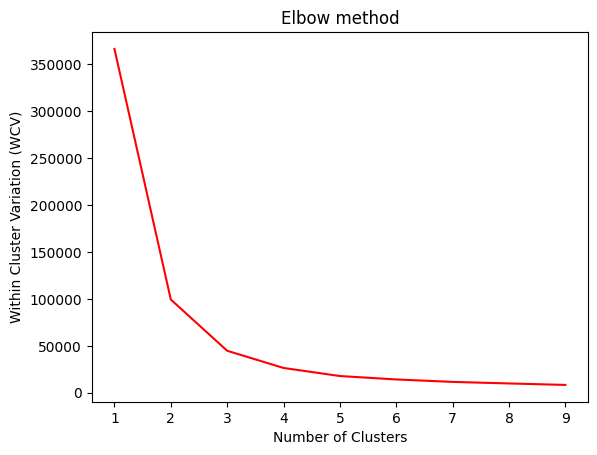

In [36]:
elbow_method(scaled_data=scaled_data)

<h4>Question</h4>
<p>Q_D3: What is the best optimal number of clusters?</p>

In [37]:

### 
# TODO: Read the optimal number of clusters from the Elbow plot above.
###

optimal_number_of_clusters = 3

<h4> --- D4: Cluster the data --- </h4>
<p>
After deciding upon the optimal number of clusters, we run the KMeans algorithm once more to cluster the data. <br>
Thereafter, we will combine the data and clustering labels into one pandas DataFrame. <br>
</p>

In [38]:
kmeans = KMeans(init= 'k-means++', n_clusters=optimal_number_of_clusters, random_state=0).fit(scaled_data)

c:\Users\phmot\Documents\Client\Datacademy\datacademy-v2\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [39]:
bid_statistic['cluster'] = kmeans.labels_
bid_statistic

,auctionID,LotNr,AccountID,NOB,ABP,HBP,TOE,TOX,Duration,cluster
0,200001,1,2623749,3,31000.0,34000.0,0.998297,0.999567,26262.533333,0
1,200001,1,2694572,4,23500.0,25000.0,0.954183,0.989500,26262.533333,0
2,200001,1,2785630,1,22500.0,22500.0,0.956727,0.956727,26262.533333,0
3,200001,1,2851482,2,19000.0,19500.0,0.455016,0.629394,26262.533333,2
4,200001,1,2930599,3,19000.0,20000.0,0.400309,0.683017,26262.533333,2
...,...,...,...,...,...,...,...,...,...,...
1136256,210455,509,2919997,1,15.0,15.0,0.192513,0.192513,46.750000,1
1136257,210455,509,3328984,1,10.0,10.0,0.000000,0.000000,46.750000,1
1136258,210455,516,2834863,1,10.0,10.0,0.000000,0.000000,7027.983333,1
1136259,210455,516,3170566,1,15.0,15.0,0.928540,0.928540,7027.983333,0


<h4> --- D5: Extract cluster characteristics --- </h4>
<p>
Solemnly having the data clustered does not really have any descriptive business value. <br>
What we want to see is what these clusters imply, which is done through extraction of cluster characteristics. <br>
In a similar manner as we extracted the clustering characteristics, we can apply Pandas Groupby to extract these values. <br>
What we would like to see is the following values for all clusters separately: 
<ol>
    <li> Average NOB (Number of Bids) </li>
    <li> Average ABP (Average Bid Price) </li>
    <li> Average HBP (Highest Bid Price) </li>
    <li> Average TOE (Time of Entry) </li>
    <li> Average TOX (Time of Exit) </li>
</ol>
</p>

In [40]:
bid_statistic

,auctionID,LotNr,AccountID,NOB,ABP,HBP,TOE,TOX,Duration,cluster
0,200001,1,2623749,3,31000.0,34000.0,0.998297,0.999567,26262.533333,0
1,200001,1,2694572,4,23500.0,25000.0,0.954183,0.989500,26262.533333,0
2,200001,1,2785630,1,22500.0,22500.0,0.956727,0.956727,26262.533333,0
3,200001,1,2851482,2,19000.0,19500.0,0.455016,0.629394,26262.533333,2
4,200001,1,2930599,3,19000.0,20000.0,0.400309,0.683017,26262.533333,2
...,...,...,...,...,...,...,...,...,...,...
1136256,210455,509,2919997,1,15.0,15.0,0.192513,0.192513,46.750000,1
1136257,210455,509,3328984,1,10.0,10.0,0.000000,0.000000,46.750000,1
1136258,210455,516,2834863,1,10.0,10.0,0.000000,0.000000,7027.983333,1
1136259,210455,516,3170566,1,15.0,15.0,0.928540,0.928540,7027.983333,0


In [41]:
cluster_statistics = bid_statistic.groupby(['cluster']).agg({
    'NOB': ['mean'], 
    'ABP': ['mean'], 
    'HBP': ['mean'], 
    'TOE': ['mean'], 
    'TOX': ['mean']
    })

cluster_statistics

,NOB,ABP,HBP,TOE,TOX
,mean,mean,mean,mean,mean
cluster,,,,,
0,2.935153,569.412425,660.483315,0.924981,0.957024
1,1.547005,251.000293,278.914968,0.062987,0.086264
2,3.966066,453.819655,602.468527,0.290776,0.751338


<h3> E: Predict sale or no-sale </h3>
<p>
After clustering (which is unsupervised learning) we are now going to apply supervised learning in the form of forecasting. <br>
To improve the auction platform we want to automate the decision about what the starting bid should be. <br>
For this, we will use a prediction model which predicts if a product will be sold. <br>
By increasing the starting bid iteratively and continuously checking if a product will be sold, we can define a breaking point. <br>
This breaking point is where the product goes from a sold prediction to an unsold prediction, which shows the highest starting bid which will result in a sell. <br>
<br>

This use case is of course greatly simplified, as the assumption that a higher starting bid will result in a higher final bid is quite a big one. <br>
But for the sole purpose of testing whether you understand the fundamentals of supervised learning it will suffice. <br>
What we want you to do is the following:
<ol>
    <li> Merge and preprocess the auction and lots data. </li>
    <li> Create both a 70/30 training/test set (with random_state=0) of the lots dataset. </li>
    <li> Initialize both the <code>LogisticRegression()</code> and <code>RandomForestClassifier()</code> using default settings and with random state 0. </li>
    <li> Train both models using <code>.fit(X_train, y_train)</code>. </li>
    <li> Predict the labels of the test set by using <code>.predict(X_test, y_test)</code>. </li>
    <li> Calculate the model accuracy using the imported function and plot the confusion matrix. </li>
    <li> Save the best performing model to a model.pkl file to be used later. </li>
</ol>

</p>

<h4> --- E1: Merge and preprocess the auction and lots data --- </h4>
<p>
First we are going to extract the desired columns from both the lots and auction data. <br>
Thereafter we merge these tables, taking the lots data as our main table. <br>
After merging two preprocessing steps need to be executed:
<ul>
    <li> Transform datetime objects into tangible numeric value. </li>
    <li> Apply one-hot encoding to categorical variables. </li>
</ul>
</p>

In [43]:
# # Retrieve desired columns from lots and auction datasets
# Lots_Sales_Pred = lots[['auctionID', 'lotNr', 'numberOfItems', 'estimatedValue', 'startingBid', 'reserveBid', 'sold']].copy()
# Auctions_merge = auctions[['id', 'auctionStart', 'auctionEnd', 'branchCategory']].copy()

# # Combine data into a single dataset
# Lots_Sales_Pred = pd.merge(Lots_Sales_Pred, Auctions_merge, left_on=['auctionID'], right_on=['id'], how='left')
# Lots_Sales_Pred_original = Lots_Sales_Pred.copy(deep=True)

# Lots_Sales_Pred = Lots_Sales_Pred.dropna()  
# Lots_Sales_Pred.drop('id', axis=1, inplace=True)
# Lots_Sales_Pred

# The merge is easier in a SQL query:
sql_merge_query = """
                SELECT
                    lots.auctionID, 
                    lots.lotNr, 
                    lots.numberOfItems, 
                    lots.estimatedValue, 
                    lots.startingBid,
                    lots.reserveBid,
                    lots.sold,
                    auctions.auctionStart,
                    auctions.auctionEnd,
                    auctions.branchCategory
                FROM lots
                LEFT JOIN auctions ON 
                    lots.auctionID = auctions.id
                  """

Lots_Sales_Pred = pandas_df_from_database(query=sql_merge_query)
Lots_Sales_Pred

,auctionID,lotNr,numberOfItems,estimatedValue,startingBid,reserveBid,sold,auctionStart,auctionEnd,branchCategory
0,200013,1,1,0.0,10.0,1.0,0,2017-12-19T11:22:29,2018-01-02T14:22:29,consumer
1,200013,2,1,0.0,25.0,1.0,1,2017-12-19T11:22:29,2018-01-02T14:22:29,consumer
2,200013,3,1,0.0,25.0,1.0,0,2017-12-19T11:22:29,2018-01-02T14:22:29,consumer
3,200013,4,1,0.0,25.0,1.0,0,2017-12-19T11:22:29,2018-01-02T14:22:29,consumer
4,200013,5,66,0.0,10.0,1.0,0,2017-12-19T11:22:29,2018-01-02T14:22:29,consumer
...,...,...,...,...,...,...,...,...,...,...
285298,210447,1242,1,700.0,100.0,1.0,1,2019-06-17T15:14:18,2019-06-28T19:14:18,transport
285299,210447,1243,1,1000.0,100.0,1.0,1,2019-06-17T15:14:18,2019-06-28T19:14:18,transport
285300,210447,1244,1,700.0,100.0,1.0,1,2019-06-17T15:14:18,2019-06-28T19:14:18,transport
285301,210447,1245,1,700.0,100.0,1.0,1,2019-06-17T15:14:18,2019-06-28T19:14:18,transport


In [44]:
# Transform auctionStart and auctionEnd into a single column depicting the duration of the auction in hours
Lots_Sales_Pred[['auctionStart', 'auctionEnd']] = Lots_Sales_Pred[['auctionStart', 'auctionEnd']].apply(pd.to_datetime, errors='coerce') 
Lots_Sales_Pred['auctionDuration'] = (Lots_Sales_Pred['auctionEnd'] - Lots_Sales_Pred['auctionStart']).apply(lambda x: abs(x/pd.Timedelta('1 hour')))
Lots_Sales_Pred.drop(['auctionStart', 'auctionEnd'], axis=1, inplace=True)

Lots_Sales_Pred

,auctionID,lotNr,numberOfItems,estimatedValue,startingBid,reserveBid,sold,branchCategory,auctionDuration
0,200013,1,1,0.0,10.0,1.0,0,consumer,339.0
1,200013,2,1,0.0,25.0,1.0,1,consumer,339.0
2,200013,3,1,0.0,25.0,1.0,0,consumer,339.0
3,200013,4,1,0.0,25.0,1.0,0,consumer,339.0
4,200013,5,66,0.0,10.0,1.0,0,consumer,339.0
...,...,...,...,...,...,...,...,...,...
285298,210447,1242,1,700.0,100.0,1.0,1,transport,268.0
285299,210447,1243,1,1000.0,100.0,1.0,1,transport,268.0
285300,210447,1244,1,700.0,100.0,1.0,1,transport,268.0
285301,210447,1245,1,700.0,100.0,1.0,1,transport,268.0


Now we have executed all manual transformations to the data, it is time to create the data <b>pipeline</b>. <br>
<br>
First we will create a numerical and categorical pipeline, after which we combine both and append a classifier to it. <br>
To do this we create a function named <code>create_pipeline()</code>, as this allows us to create these pipelines dynamically. <br>
This will be useful for the way we intend to test the two classification models mentioned before in a looping fashion.

In [45]:
def create_pipeline(scaler, encoder, clf, cat_col:list, num_col:list) -> Pipeline:
    """
    Take the imputer, scaler, encoder and classifier and create and return a sklearn pipeline.

    Args:
        scaler (_type_): Scaling module, used to scale the data to a set range of values.
        encoder (_type_): Encoding module, used to transform categorical values to a workable format.
        clf (_type_): Classification model, which can be any model from the sklearn classification model catalog.
        cat_col (list): A list of the categorical columns that need to be transformed.
        num_col (list): A list of the numerical columns that need to be transformed.

    Returns:
        Pipeline: Pipeline containing all preprocessing and classification models.
    """
    # 2 sub-pipelines, one for numeric features, other for categorical ones
    numeric_pipe = make_pipeline(scaler)
    categorical_pipe = make_pipeline(encoder)

    # Using categorical pipe for feature State, numeric pipe otherwise
    preprocessor = make_column_transformer((categorical_pipe, cat_col), 
                                            (numeric_pipe, num_col),
                                            remainder='passthrough')
    
    return Pipeline(steps=[('preprocess', preprocessor), ('clf', clf)])

<h4> --- E2: Create both a 70/30 training/test set (with random_state=0) of the lots dataset. --- </h4>
The quality of the supervised learning method is in a big way dependent on de amount of data that is available. <br>
As we have to split the data into a train and test set, the set used for training the model also decreases in size. <br>
For this reason it is a must to put this data to good use to get a reliable evaluation of the performance of different models.

In [46]:
# First split the data in independent (X) and dependent (y) variables
X_sale = Lots_Sales_Pred.copy().drop(['auctionID', 'lotNr', 'sold'], axis=1)
y_sale = Lots_Sales_Pred['sold'].copy()

X_train, X_test, y_train, y_test = train_test_split(X_sale, y_sale, test_size=0.3, random_state=0)
print(f'Created a training set containing {len(X_train)} records and a test set containing {len(X_test)} records')

Created a training set containing 199712 records and a test set containing 85591 records



<h4> --- E3: Initialize both the <code>LogisticRegression()</code> and <code>RandomForestClassifier()</code> using default settings and with random state 0. --- </h4>
<h4> --- E4: Train both models using <code>.fit(X_train, y_train)</code>. --- </h4>
<h4> --- E5: Predict the labels of the test set by using <code>.predict(X_test, y_test)</code>. --- </h4>
<h4> --- E6: Calculate the model accuracy. --- </h4>

In [57]:
# # One hot encode categorical variable to enable it to be used for forecasting
Lots_Sales_Pred = pd.concat([Lots_Sales_Pred,pd.get_dummies(Lots_Sales_Pred['branchCategory'], prefix='BC')],axis=1)
Lots_Sales_Pred.drop(['branchCategory'], axis=1, inplace=True)

# # Min-max scale all numeric values to mitigate the effect of values being on different scales.
scl = MinMaxScaler()
Lots_Sales_Pred[['numberOfItems', 'estimatedValue', 'startingBid', 'reserveBid', 'auctionDuration']] = scl.fit_transform(
     Lots_Sales_Pred[['numberOfItems', 'estimatedValue', 'startingBid', 'reserveBid', 'auctionDuration']]
     )

Lots_Sales_Pred

,auctionID,lotNr,numberOfItems,estimatedValue,startingBid,reserveBid,sold,auctionDuration,BC_agricultural,BC_construction,BC_consumer,BC_food,BC_graphical,BC_metal,BC_other,BC_pharmaceutical,BC_plastic,BC_real estate,BC_transport,BC_woodworking
0,200013,1,0.000000,0.000000,0.000008,0.0001,0,0.036256,False,False,True,False,False,False,False,False,False,False,False,False
1,200013,2,0.000000,0.000000,0.000019,0.0001,1,0.036256,False,False,True,False,False,False,False,False,False,False,False,False
2,200013,3,0.000000,0.000000,0.000019,0.0001,0,0.036256,False,False,True,False,False,False,False,False,False,False,False,False
3,200013,4,0.000000,0.000000,0.000019,0.0001,0,0.036256,False,False,True,False,False,False,False,False,False,False,False,False
4,200013,5,0.000208,0.000000,0.000008,0.0001,0,0.036256,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285298,210447,1242,0.000000,0.000538,0.000077,0.0001,1,0.028595,False,False,False,False,False,False,False,False,False,False,True,False
285299,210447,1243,0.000000,0.000769,0.000077,0.0001,1,0.028595,False,False,False,False,False,False,False,False,False,False,True,False
285300,210447,1244,0.000000,0.000538,0.000077,0.0001,1,0.028595,False,False,False,False,False,False,False,False,False,False,True,False
285301,210447,1245,0.000000,0.000538,0.000077,0.0001,1,0.028595,False,False,False,False,False,False,False,False,False,False,True,False


In [47]:
# Create preprocessing steps into variables
scaler = MinMaxScaler()
sclr_col = ['numberOfItems', 'estimatedValue', 'startingBid', 'reserveBid', 'auctionDuration']

encoder = OneHotEncoder()
encd_col = ['branchCategory']

classifiers = [
     LogisticRegression(max_iter=5000, random_state=0),
     RandomForestClassifier(random_state=0)
     ]

# Save predictions
predictions_clf = {
    'LogisticRegression': None,
    'RandomForestClassifier': None
    }

# Test each different classifier
for clf in classifiers:
    name_clf = str(clf).split('(')[0]

    # Combine with learning algorithm in another pipeline
    pipe = create_pipeline(scaler, encoder, clf, cat_col=encd_col, num_col=sclr_col)
    clf_pipe = pipe.fit(X=X_train, y=y_train)

    # Save the predicted values in a list
    predictions_clf[name_clf] = clf_pipe.predict(X_test)
    
    # Print the test accuracy
    print(f"{name_clf} test accuracy: {clf_pipe.score(X_test, y_test):.3f}")

LogisticRegression test accuracy: 0.817
RandomForestClassifier test accuracy: 0.841


<h4> --- E7: Plot the confusion matrix. --- </h4>

Confusion Matrix: Logistic Regression


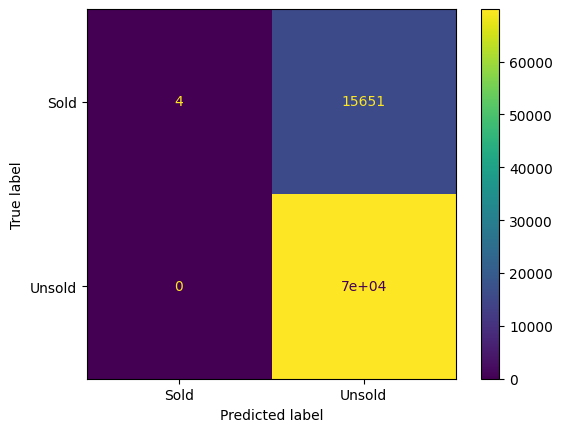

In [48]:
print(f'Confusion Matrix: Logistic Regression')
cm_logRes = confusion_matrix(y_test, predictions_clf['LogisticRegression'])
disp = ConfusionMatrixDisplay(cm_logRes, display_labels=['Sold', 'Unsold']).plot()

Confusion Matrix: Random Forest Classifier


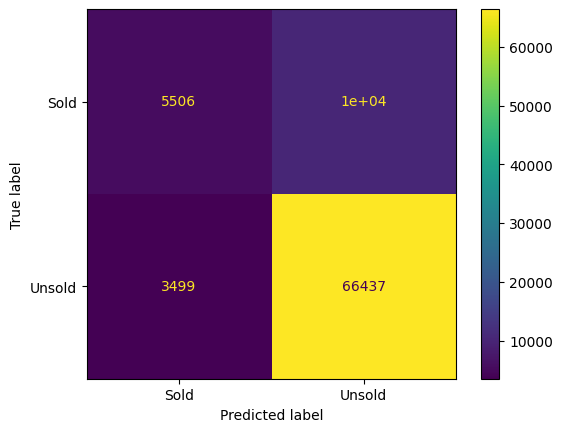

In [49]:
print(f'Confusion Matrix: Random Forest Classifier')
cm_rf = confusion_matrix(y_test, predictions_clf['RandomForestClassifier'])
disp = ConfusionMatrixDisplay(cm_rf, display_labels=['Sold', 'Unsold']).plot()

In [50]:
X_test['pred'] = predictions_clf['RandomForestClassifier']

In [51]:
X_test[X_test['pred'] != 1.0]

,numberOfItems,estimatedValue,startingBid,reserveBid,branchCategory,auctionDuration,pred
284251,1,10.0,10.0,1.0,transport,268.000000,0
180044,1,10.0,10.0,1.0,consumer,267.500000,0
90044,50,0.0,150.0,1.0,transport,287.000000,0
141053,1,0.0,700.0,1.0,transport,219.500000,0
137838,1,200.0,50.0,0.0,metal,142.750000,0
...,...,...,...,...,...,...,...
61904,8,0.0,80.0,1.0,consumer,526.250000,0
62225,300,0.0,75.0,1.0,consumer,526.250000,0
176822,24,0.0,60.0,1.0,consumer,320.166667,0
81263,1,180.0,90.0,1.0,transport,314.750000,0


In [52]:
Lots_Sales_Pred.iloc[284251]

auctionID             210447
lotNr                    192
numberOfItems              1
estimatedValue          10.0
startingBid             10.0
reserveBid               1.0
sold                       1
branchCategory     transport
auctionDuration        268.0
Name: 284251, dtype: object

<h4> --- Save the best performing model to a model.pkl file to be used later. --- </h4> 

As a best practice, once the best model has been selected, one should retrain it on the entire dataset. <br>
You can still use a pipeline, add that classifier to the pipeline, retrain using all the data. Save the end model. <br>
The end result is your entire data set was trained inside the full pipeline you desire. This makes it more robust. <br>
 In reality, this means you call <code>pipeline.fit()</code> and save the pipeline.

In [54]:
import joblib

# Combine with learning algorithm in another pipeline
pipe_to_save = create_pipeline(
                    scaler=MinMaxScaler(),
                    encoder=OneHotEncoder(),
                    clf=RandomForestClassifier(random_state=0),
                    cat_col=['branchCategory'],
                    num_col=['numberOfItems', 'estimatedValue', 'startingBid', 'reserveBid', 'auctionDuration']
                    )

# Train on all data for better estimate
trained_pipe = pipe_to_save.fit(X=X_sale, y=y_sale)

# joblib save pipeline
joblib.dump(trained_pipe, f"trained_pipeline.pkl") 

['trained_pipeline.pkl']

In [55]:
columns_train = list(X_sale.branchCategory.unique()) + ['numberOfItems', 'estimatedValue', 'startingBid', 'reserveBid', 'auctionDuration']

In [ ]:
# trained_pipe.named_steps["clf"].feature_importances_

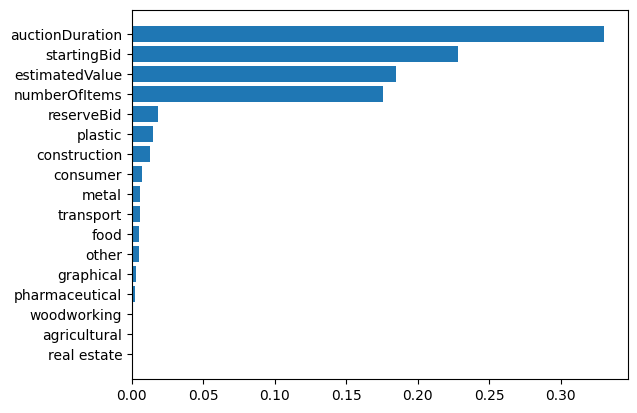

In [56]:
f_i = list(zip(columns_train, trained_pipe.named_steps["clf"].feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

<h3>E: Implement AI Prediction into Create Lot</h3>
<p>
So far we created a simplistic prediction model and a database containing our data. <br>
We also build APIs to communicate with our database, which also allow for the creation of new auctions, lots and bids <br>
Our next task is to deploy our prediction model in the creation of a lot. <br>
<br>

When a new lot is created a fundamental step is to decide the starting price of the auctioned lot. <br>
To make this data driven, your task is to implement the prediction model to automatically set an optimal price. <br>
This is done through incrementally increasing the starting bid until the lot prediction of the lot goes from sold to unsold. <br>
Implementing the automation of the starting bid is of course hugely simplified, as it acquiesces on the assumption that a higher starting bid will result in a higher final bid. <br>
However, for the sole purpose of deploying an AI model it suffices. <br>
<br>

To execute this assignment, go to the directory called "app" and open the python file "Services". <br>
Here you need to change the functionality of the <code>create_lot()</code> function. <br>
Within this function some basis code is already given (which you have to uncomment), to get you up to speed.
</p>

<h4> --- Test the following auction: --- </h4>
<ul>
    <li> numberOfItems: 7 </li>
    <li> estimatedValue: 100 </li>
    <li> reserveBid: 1.0 </li>
    <li> branchCategory : transport </li>
    <li> auctionDuration: 250.0 </li>
    <li> min_starting_bid: 5 </li>
    <li> max_starting_bid: 155 </li>
    <li> step_size: 5 </li>
</ul>

<h3>F: Dashboarding </h3>

- Download SQLite ODBC driver
- Download PowerBI

- Press "Get data" and make an ODBC connection
- Set DSN to None and open "Advanced settings"
- Write a connection string, which is: DRIVER={SQLite3 ODBC Driver};Database=C:\ [PATH TO THIS DIRECTORY] \database.db;
- Write something for username and password (as this is not checked but needed to go through)
- Press "Load Data" to get the data into PowerBI
- Fix many-to-many cardinality by creating additional column with auctionLotID in both Lots and Bids datasets
